In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import math

In [2]:
ddir = "../output_files"
lda = pd.read_csv(f"{ddir}/exhaustiveSelectionResultsLDA.csv")
nb = pd.read_csv(f"{ddir}/exhaustiveSelectionResultsNB.csv")
params = pd.read_csv(f"{ddir}/n_params.csv")

In [3]:
# '\s+' tells pandas to use any spaces as the delimiter instead of ,
train_df = pd.read_csv("../data/train.2024.04.16.csv")
feature_col_names = np.array(['F01', 'F02', 'F03', 'F04',
       'F05', 'F06', 'F07', 'F08', 'F09', 'F10', 'F11', 'F12', 'F13'])

In [4]:
lda.head()

,feature_inds,n_features,mean,std,fold01,fold02,fold03,fold04,fold05,fold06,...,fold11,fold12,fold13,fold14,fold15,fold16,fold17,fold18,fold19,fold20
0,"(0,)",1,0.447372,0.053722,0.419835,0.557362,0.441176,0.446480,0.478476,0.455381,...,0.496333,0.459592,0.480231,0.422739,0.473477,0.499415,0.450820,0.316436,0.483810,0.388596
1,"(1,)",1,0.432827,0.058525,0.373656,0.442334,0.534041,0.423103,0.393778,0.335619,...,0.433180,0.442593,0.412263,0.348606,0.440717,0.462185,0.489553,0.576886,0.423656,0.375390
2,"(2,)",1,0.370803,0.053193,0.387545,0.413943,0.328930,0.293333,0.288714,0.344269,...,0.335520,0.446834,0.371114,0.333158,0.428523,0.434029,0.381572,0.333333,0.286458,0.388121
3,"(3,)",1,0.508014,0.043824,0.471138,0.408465,0.523297,0.603581,0.546861,0.547980,...,0.506225,0.554515,0.529620,0.539344,0.478962,0.505179,0.493879,0.542424,0.507983,0.462963
4,"(4,)",1,0.436959,0.053821,0.425000,0.375347,0.410980,0.514049,0.412022,0.422047,...,0.379476,0.502297,0.475508,0.494745,0.386905,0.400314,0.495082,0.461749,0.383952,0.418333


In [5]:
lda[lda["n_features"]== 1]

,feature_inds,n_features,mean,std,fold01,fold02,fold03,fold04,fold05,fold06,...,fold11,fold12,fold13,fold14,fold15,fold16,fold17,fold18,fold19,fold20
0,"(0,)",1,0.447372,0.053722,0.419835,0.557362,0.441176,0.446480,0.478476,0.455381,...,0.496333,0.459592,0.480231,0.422739,0.473477,0.499415,0.450820,0.316436,0.483810,0.388596
1,"(1,)",1,0.432827,0.058525,0.373656,0.442334,0.534041,0.423103,0.393778,0.335619,...,0.433180,0.442593,0.412263,0.348606,0.440717,0.462185,0.489553,0.576886,0.423656,0.375390
2,"(2,)",1,0.370803,0.053193,0.387545,0.413943,0.328930,0.293333,0.288714,0.344269,...,0.335520,0.446834,0.371114,0.333158,0.428523,0.434029,0.381572,0.333333,0.286458,0.388121
3,"(3,)",1,0.508014,0.043824,0.471138,0.408465,0.523297,0.603581,0.546861,0.547980,...,0.506225,0.554515,0.529620,0.539344,0.478962,0.505179,0.493879,0.542424,0.507983,0.462963
4,"(4,)",1,0.436959,0.053821,0.425000,0.375347,0.410980,0.514049,0.412022,0.422047,...,0.379476,0.502297,0.475508,0.494745,0.386905,0.400314,0.495082,0.461749,0.383952,0.418333
5,"(5,)",1,0.592188,0.067827,0.637262,0.570513,0.682464,0.527435,0.639635,0.514960,...,0.616190,0.612236,0.652670,0.497132,0.664904,0.679233,0.505337,0.623668,0.590183,0.554874
6,"(6,)",1,0.584951,0.046179,0.614834,0.561302,0.639635,0.669082,0.531926,0.478330,...,0.663300,0.564803,0.589847,0.550396,0.603963,0.552174,0.572402,0.618841,0.561197,0.583763
7,"(7,)",1,0.388157,0.048366,0.370139,0.379476,0.410714,0.342735,0.495082,0.422047,...,0.408465,0.408465,0.422047,0.342735,0.279070,0.334077,0.412022,0.410714,0.419048,0.454667
8,"(8,)",1,0.633815,0.088275,0.605050,0.693028,0.543194,0.611388,0.553254,0.815573,...,0.730994,0.554556,0.693275,0.683473,0.672918,0.575285,0.473019,0.700547,0.602863,0.636231
9,"(9,)",1,0.514919,0.027271,0.530345,0.491751,0.471751,0.516624,0.548037,0.521220,...,0.473913,0.558123,0.510574,0.538606,0.517677,0.482036,0.496592,0.547980,0.485517,0.543860


In [62]:
lda["feature_inds_t"] = lda.apply(lambda x: np.array(eval(x["feature_inds"])), axis=1)
nb["feature_inds_t"] = nb.apply(lambda x: np.array(eval(x["feature_inds"])), axis=1)

In [70]:
nb["train_frac"] = nb.apply(lambda x: train_df[np.all(~np.isnan(train_df[feature_col_names[x["feature_inds_t"]]]), axis=1)].shape[0]/train_df.shape[0], axis=1)
lda["train_frac"] = lda.apply(lambda x: train_df[np.all(~np.isnan(train_df[feature_col_names[x["feature_inds_t"]]]), axis=1)].shape[0]/train_df.shape[0], axis=1)

In [6]:
lda.groupby("n_features")["mean"].std().values

array([0.0985719 , 0.09182599, 0.0692428 , 0.05496496, 0.04721717,
       0.04149223, 0.03653541, 0.03176846, 0.02764421, 0.02378285,
       0.02073276, 0.01858514,        nan])

In [7]:
ldaSumm = lda.groupby("n_features")["mean"].mean().reset_index()
ldaSumm["std"] = lda.groupby("n_features")["mean"].std().values
ldaSumm.loc[ldaSumm["n_features"] == 13, "std"] = 0
ldaSumm

,n_features,mean,std
0,1,0.515487,0.098572
1,2,0.666938,0.091826
2,3,0.752877,0.069243
3,4,0.802504,0.054965
4,5,0.836579,0.047217
5,6,0.862264,0.041492
6,7,0.882554,0.036535
7,8,0.898679,0.031768
8,9,0.911724,0.027644
9,10,0.922304,0.023783


In [8]:
nbSumm = nb.groupby("n_features")["mean"].mean().reset_index()
nbSumm["std"] = nb.groupby("n_features")["mean"].std().values
nbSumm.loc[nbSumm["n_features"] == 13, "std"] = 0
nbSumm

,n_features,mean,std
0,1,0.554876,0.122761
1,2,0.720048,0.091030
2,3,0.796277,0.061884
3,4,0.837999,0.048565
4,5,0.863881,0.039129
5,6,0.881074,0.032538
6,7,0.892846,0.027148
7,8,0.901911,0.022092
8,9,0.909038,0.017569
9,10,0.914257,0.013689


In [74]:
ldaData = lda.groupby("n_features")["train_frac"].mean().reset_index()
ldaData["std"] = lda.groupby("n_features")["train_frac"].std().values
ldaData.loc[ldaData["n_features"] == 13, "std"] = 0
ldaData


,n_features,train_frac,std
0,1,0.328229,0.146503
1,2,0.227263,0.093026
2,3,0.184374,0.062942
3,4,0.160447,0.048896
4,5,0.144369,0.040729
5,6,0.132464,0.034178
6,7,0.123327,0.028326
7,8,0.116239,0.022840
8,9,0.110765,0.017526
9,10,0.106625,0.012313


In [75]:
nbData = nb.groupby("n_features")["train_frac"].mean().reset_index()
nbData["std"] = nb.groupby("n_features")["train_frac"].std().values
nbData.loc[nbData["n_features"] == 13, "std"] = 0
nbData

,n_features,train_frac,std
0,1,0.328229,0.146503
1,2,0.227263,0.093026
2,3,0.184374,0.062942
3,4,0.160447,0.048896
4,5,0.144369,0.040729
5,6,0.132464,0.034178
6,7,0.123327,0.028326
7,8,0.116239,0.022840
8,9,0.110765,0.017526
9,10,0.106625,0.012313


In [144]:
nbData.equals(ldaData)

True

In [145]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

def plot_curves(df, title, param_df, param_col, data_df, ax = None):
    if ax is None:
        fig, ax = plt.subplots()
    ax.plot(df["n_features"], df["mean"], marker="x", color="k", label="score mean")
    ax.fill_between(df["n_features"], 
                    df["mean"]-df["std"], 
                    df["mean"]+df["std"], 
                    label="score std",
                    color="k",
                    alpha=0.5)
    ax.set_ylim([0.4, 0.97])
    ax.set_title(title)
    ax.set_xticks(df["n_features"]);
    ax.set_ylabel("CV Mean F1 Score")
    ax.set_xlabel("Number of Features")

    ax2 = ax.twinx()
    ax3 = ax.twinx()

    ax3.spines["right"].set_position(("axes", 1.2))
    make_patch_spines_invisible(ax3)
    ax3.spines["right"].set_visible(True)
    ax3.plot(data_df["n_features"], data_df["train_frac"], 
             marker="o", color="r", label="data frac. mean")
    ax3.fill_between(data_df["n_features"], 
                     data_df["train_frac"]-data_df["std"], 
                     data_df["train_frac"]+data_df["std"], 
                     label="data frac. std", color="r", alpha=0.5)
    ax3.set_ylim([0, 1])
    ax3.set_ylabel("Fraction of Training Examples")

    ax2.plot(param_df["n_features"], param_df[param_col], 
             color="b", marker="^", label="parameters")
    ax2.set_ylabel("Number of Parameters")

    ax2.yaxis.label.set_color("b")
    ax3.yaxis.label.set_color("r")
    ax2.tick_params(axis='y', colors="b")
    ax3.tick_params(axis='y', colors="r")

    lkw = dict(borderpad=0.1, labelspacing=0.2, handletextpad=0.4)
    ax.legend(loc=(0.67, 0.35), **lkw)
    ax2.legend(loc=(0.67, 0.5), **lkw)
    ax3.legend(loc=(0.6, 0.2), **lkw)


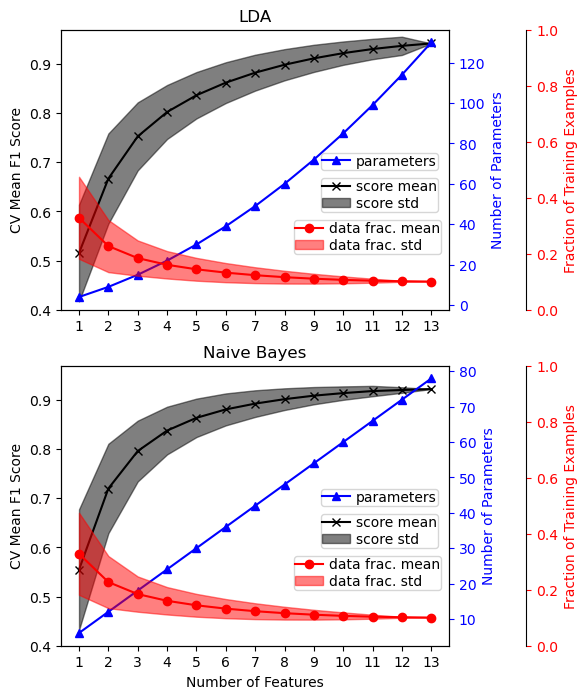

In [146]:
fig, axes = plt.subplots(2, figsize=(5, 8))
plot_curves(ldaSumm, "LDA", params, "LDA_n_params", ldaData, axes[0])
# axes[0].set_xticklabels([])
axes[0].set_xlabel("")
plot_curves(nbSumm, "Naive Bayes", params, "NB_n_params", nbData, axes[1])

In [47]:
nb

,feature_inds,n_features,mean,std,fold01,fold02,fold03,fold04,fold05,fold06,...,fold11,fold12,fold13,fold14,fold15,fold16,fold17,fold18,fold19,fold20
0,"(0,)",1,0.475280,0.043276,0.447619,0.564187,0.504708,0.477196,0.524912,0.439560,...,0.496333,0.461930,0.453216,0.455381,0.562290,0.504971,0.474074,0.420370,0.501016,0.446866
1,"(1,)",1,0.459459,0.064098,0.417683,0.483288,0.529630,0.486992,0.367577,0.339282,...,0.449546,0.461111,0.468293,0.390564,0.479312,0.427119,0.414340,0.567362,0.491160,0.559517
2,"(2,)",1,0.402200,0.047345,0.438471,0.409778,0.389683,0.410980,0.288714,0.382222,...,0.330903,0.484000,0.397946,0.333158,0.469697,0.456251,0.432362,0.369048,0.386029,0.404910
3,"(3,)",1,0.507235,0.043494,0.471138,0.408465,0.523297,0.603581,0.546861,0.547980,...,0.506225,0.554515,0.509630,0.539344,0.478962,0.505179,0.493879,0.542424,0.507983,0.462963
4,"(4,)",1,0.430973,0.055880,0.425000,0.331857,0.410980,0.494745,0.412022,0.434524,...,0.379476,0.469444,0.475508,0.494745,0.386905,0.363757,0.495082,0.461749,0.383952,0.418333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8186,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)",12,0.925593,0.049158,0.933333,0.900000,0.821778,0.963285,0.924603,0.964519,...,0.868844,1.000000,0.912341,0.963285,0.911852,0.912341,0.949556,0.821778,0.932660,0.965899
8187,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",12,0.921798,0.047601,0.933333,0.885029,0.821778,0.963285,0.924603,0.947086,...,0.868844,1.000000,0.881325,0.963285,0.911852,0.912341,0.934219,0.839975,0.932660,0.965899
8188,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",12,0.909779,0.050840,0.882711,0.885029,0.829086,0.963285,0.924603,0.912341,...,0.868844,1.000000,0.896296,0.963285,0.828956,0.912341,0.934219,0.827160,0.899749,0.965899
8189,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",12,0.917425,0.047220,0.933333,0.901347,0.789495,0.963285,0.924603,0.947086,...,0.868844,0.966583,0.896296,0.928030,0.911852,0.912341,0.949556,0.839975,0.932660,0.965899


In [151]:
nbData.columns = ['n_features', 'train_frac_mean', 'train_frac_std']
nbData

,n_features,train_frac_mean,train_frac_std
0,1,0.328229,0.146503
1,2,0.227263,0.093026
2,3,0.184374,0.062942
3,4,0.160447,0.048896
4,5,0.144369,0.040729
5,6,0.132464,0.034178
6,7,0.123327,0.028326
7,8,0.116239,0.022840
8,9,0.110765,0.017526
9,10,0.106625,0.012313


In [152]:
nbData.to_csv("../output_files/exhaustiveSelectionTrainingFracSumm.csv", index=False)